#Aliasing
Shows aliasing effect with discrete fourier transform on a signal.


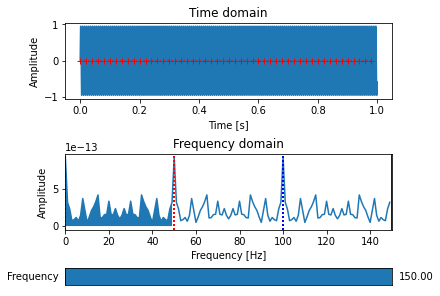

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import Slider
from matplotlib.animation import FuncAnimation, FFMpegWriter


def compute_dft(fs, duree, sig):
    """Compute a dft manually with 3 periods."""
    freqs = np.arange(0, 3*fs, 1/duree)
    tf = np.zeros(freqs.shape, dtype=np.complex64)
    N = len(sig)
    idxs = np.arange(0, N)
    for k, f in enumerate(freqs):
        tf[k] = np.sum(sig * np.exp(-1j*2*np.pi*k*idxs/N))
    return freqs, tf


class Aliasing_Window():
    """Represents an analogic signal, its sampling and DFT."""

    def __init__(self):
        self.fs = 50 #sampling rate
        self.freq = 1
        self.duree = 1
        self.f_min = 1
        self.f_max = 150
        self.fig = plt.figure(constrained_layout=True)
        self.gs = GridSpec(3, 1, figure=self.fig,
                           height_ratios=(0.45, 0.45,0.1))
        self.td = self.fig.add_subplot(self.gs[0, :])
        self.fd = self.fig.add_subplot(self.gs[1, :])
        self.freq_in = self.fig.add_subplot(self.gs[2, :])
        self.init_sliders()
        self.init_time_domain()
        self.init_freq_domain()

    def update(self, freq):
        """Recompute signal and DFT with new frequency."""
        self.freq = freq
        self.td.clear()
        self.fd.clear()
        self.init_time_domain()
        self.init_freq_domain()

    def init_sliders(self):
        """Initialize the slider for frequency."""
        def get_update():
            return self.update

        self.freq_slider = Slider(ax=self.freq_in, label='Frequency',
                                  valmin=self.f_min, valmax=self.f_max,
                                  valinit=self.freq, valstep=1)
        self.freq_slider.on_changed(get_update())

    def init_time_domain(self):
        """Plot the time domain signals."""
        an_t = np.arange(0, self.duree, 1/(10*self.f_max))
        an_sig = np.sin(2*np.pi*self.freq*an_t)
        t, sig = self.gen_sig()
        self.td.plot(an_t, an_sig)
        self.td.plot(t, sig, 'r+:')
        self.td.set_ylabel('Amplitude')
        self.td.set_title("Time domain")
        self.td.set_xlabel('Time [s]')

    def gen_sig(self):
        """Generate sampled signal."""
        t = np.arange(0, self.duree, 1/self.fs)
        sig = np.sin(2*np.pi*self.freq*t)
        return t, sig

    def init_freq_domain(self):
        """Plot the frequency domain signal (DFT)."""
        _, sig = self.gen_sig()
        freqs, tf = compute_dft(self.fs, self.duree, sig)
        self.fd.plot(freqs, abs(tf))
        dashes = (1, 1)
        width = 2
        for idx in range(4):
            self.fd.axvline((idx-1)*self.fs + self.freq,
                            color='b', dashes=dashes, linewidth=width)
            self.fd.axvline(-self.freq + (idx+1)*self.fs,
                            color='r', dashes=dashes, linewidth=width)
        self.fd.axvline(self.freq, color='b', linewidth=width)
        fill_idxs = np.arange(0, len(sig))
        self.fd.fill_between(freqs[fill_idxs], abs(tf[fill_idxs]), 0)
        self.fd.set_xlim(0, 3*self.fs)
        self.fd.set_title('Frequency domain')
        self.fd.set_xlabel('Frequency [Hz]')
        self.fd.set_ylabel('Amplitude')

    def animation_update(self, freq):
        """Change frequency signal plots and slider."""
        self.freq_slider.set_val(freq)

    def animate(self, filename, fps):
        """Animate the plot."""
        def get_animation_update():
            return self.animation_update

        an = FuncAnimation(self.fig, get_animation_update(),
                           frames=np.linspace(self.f_min, self.f_max))
        an.save(filename, dpi=150, fps = fps, writer='ffmpeg',extra_args=['-vcodec', 'libx264'])


if __name__ == '__main__':
    fig = Aliasing_Window()
    fig.animate('aliasing.mp4', 1)


In [68]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('aliasing.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""

<video width=600 alt="test" controls id="theVideo">
      <source src="%s" type="video/mp4">
</video>

""" % data_url)

# License

Cloned from: https://gitlab.com/Patidoc/signal-processing-codes.git

Refer to the COPYRIGHT file: https://gitlab.com/Patidoc/signal-processing-codes/-/blob/master/LICENSE

You can contact the developer on Twitter <a href="https://twitter.com/Patidooc">@Patidooc</a>
